In [61]:
import os
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, matthews_corrcoef

In [2]:
import nltk

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

In [76]:
import seaborn as sns

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ip_dir_path = "/content/drive/My Drive/AI cert/dataset2/"

In [8]:
for ip_file in os.listdir(ip_dir_path):
    print(ip_file)
    if 'Test' in ip_file:
        test_df = pd.read_csv(os.path.join(ip_dir_path, ip_file), encoding='utf-8')
    else:
        train_df = pd.read_csv(os.path.join(ip_dir_path, ip_file), encoding='utf-8')


FakeNewsTest.csv
FakeNewsTrain.csv


In [9]:
train_df.shape

(20800, 5)

In [10]:
test_df.shape

(5200, 4)

In [11]:
train_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
test_df.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [13]:
train_df = train_df.fillna('')
test_df = test_df.fillna('')

In [14]:
train_df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

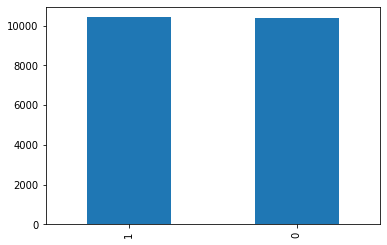

In [15]:
train_df['label'].value_counts().plot.bar() #plot the class distribution

In [16]:
def lemmatize(content):
#     lemmatized_content = re.sub('[^a-zA-Z]',' ',content)
    lemmatizer = WordNetLemmatizer()
    lemmatized_content = content.lower()
    lemmatized_content = lemmatized_content.split()
    lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if not word in stopwords.words('english')]
    lemmatized_content = ' '.join(lemmatized_content)
    return lemmatized_content

In [17]:
def stemming(content):
#     stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    port_stem = PorterStemmer()
    stemmed_content = content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [18]:
#train_df['title_stemmed'] = train_df['title'].apply(stemming)
train_df['title_lemmatized'] = train_df['title'].apply(lemmatize)

In [19]:
#train_df['text_stemmed'] = train_df['text'].apply(stemming)
train_df['text_lemmatized'] = train_df['text'].apply(lemmatize)

In [20]:
train_df['combined'] = train_df['author'] + ' ' + train_df['title_lemmatized'] #+ ' \n ' + train_df['text_lemmatized']

In [21]:
X = train_df['text_lemmatized'].values
Y = train_df['label'].values

## Logistic Model Assessment

In [22]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X_vec = vectorizer.transform(X)

In [23]:
test_df['title_lemmatized'] = test_df['title'].apply(lemmatize)
test_df['text_lemmatized'] = test_df['text'].apply(lemmatize)
test_df['combined'] = test_df['author'] + ' ' + test_df['title_lemmatized'] # + ' \n ' + test_df['text_lemmatized']

#X_test = test_df['combined'].values
X_test = test_df['text_lemmatized'].values
X_test_vec = vectorizer.transform(X_test)

In [24]:
X_train, X_eval, Y_train, Y_eval = train_test_split(X_vec, Y, test_size = 0.3, stratify=Y, random_state=2)

In [25]:
lr_model = LogisticRegression()

In [26]:
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [27]:
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9775412087912088


In [29]:
X_eval_prediction = lr_model.predict(X_eval)
lr_eval_data_accuracy = accuracy_score(X_eval_prediction, Y_eval)

## Metrics for Validation data for model assessment

In [30]:
print('Accuracy score of the evaluation set data : ', lr_eval_data_accuracy)

Accuracy score of the evaluation set data :  0.9442307692307692


In [65]:
cnf_matrix = confusion_matrix(Y_eval, X_eval_prediction)
cnf_matrix

array([[2903,  213],
       [ 135, 2989]])

In [64]:
print("Precision for this solution is -->", precision_score(Y_eval, X_eval_prediction))
print("Recall for this solution is -->", recall_score(Y_eval, X_eval_prediction))
print("Matthews Correlation Coefficient for this solution is --> ", matthews_corrcoef(Y_eval, X_eval_prediction))

Precision for this solution is --> 0.9334790755777639
Recall for this solution is --> 0.956786171574904
Matthews Correlation Coefficient for this solution is -->  0.8887355720515073


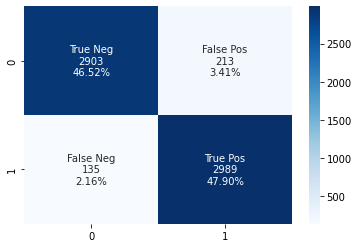

In [70]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [31]:
X_test_prediction = lr_model.predict(X_test_vec)

In [ ]:
final_df = pd.DataFrame()
final_df['id']=test_df['id']
final_df['label'] = X_test_prediction
final_df.to_csv('/content/drive/My Drive/AI cert/output/logistic_regression_prediction_final.csv', encoding='utf-8', index=False)

## LSTM model assessment

In [38]:
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [39]:
voc_size=3000 #Limit the vocabulary size to reduce training time

In [40]:
X_train, X_eval, Y_train, Y_eval = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

In [41]:
# Converting to one hot representation for train, eval and test set

onehot_rep_train = [one_hot(words,voc_size)for words in X_train]
onehot_rep_eval = [one_hot(words,voc_size)for words in X_eval]
onehot_rep_test = [one_hot(words,voc_size)for words in X_test]

In [42]:
#Padding Sentences to make them of same size
embedded_docs_train = pad_sequences(onehot_rep_train,padding='pre',maxlen=3000)
embedded_docs_eval = pad_sequences(onehot_rep_eval,padding='pre',maxlen=3000)
embedded_docs_test = pad_sequences(onehot_rep_test,padding='pre',maxlen=3000)

In [43]:
model = Sequential()
model.add(Embedding(voc_size,40,input_length=3000))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 40)          120000    
                                                                 
 dropout (Dropout)           (None, 3000, 40)          0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [44]:
X_train_final = np.array(embedded_docs_train)
y_train_final = np.array(Y_train)
X_eval_final = np.array(embedded_docs_eval)
y_eval_final = np.array(Y_eval)
X_test_final = np.array(embedded_docs_test)

In [45]:
X_train_final.shape,y_train_final.shape,X_eval_final.shape, y_eval_final.shape,X_test_final.shape

((14560, 3000), (14560,), (6240, 3000), (6240,), (5200, 3000))

In [46]:
X_test.shape

(5200,)

## GPU testing section for verification if it works on google colab. It failed to work on my PC.

In [47]:
import tensorflow as tf
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [48]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3314745274744970323
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14465892352
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6902067517695683381
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [49]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Model training

In [50]:
model.fit(X_train_final,y_train_final,epochs=20,batch_size=64)

Epoch 1/20
228/228 [==============================] - 35s 128ms/step - loss: 0.3214 - accuracy: 0.8612
Epoch 2/20
228/228 [==============================] - 29s 129ms/step - loss: 0.1798 - accuracy: 0.9349
Epoch 3/20
228/228 [==============================] - 29s 128ms/step - loss: 0.1243 - accuracy: 0.9573
Epoch 4/20
228/228 [==============================] - 29s 127ms/step - loss: 0.1301 - accuracy: 0.9525
Epoch 5/20
228/228 [==============================] - 29s 126ms/step - loss: 0.1382 - accuracy: 0.9488
Epoch 6/20
228/228 [==============================] - 29s 127ms/step - loss: 0.5335 - accuracy: 0.7269
Epoch 7/20
228/228 [==============================] - 29s 127ms/step - loss: 0.4075 - accuracy: 0.8118
Epoch 8/20
228/228 [==============================] - 29s 127ms/step - loss: 0.2201 - accuracy: 0.9221
Epoch 9/20
228/228 [==============================] - 28s 125ms/step - loss: 0.1452 - accuracy: 0.9495
Epoch 10/20
228/228 [==============================] - 29s 126ms/step - l

In [51]:
y_eval_pred = model.predict(X_eval_final)

In [52]:
y_eval_pred =np.round(y_eval_pred)
y_eval_pred = y_eval_pred.astype('int64')

## Metrics for Validation data for model assessment

In [53]:
lstm_eval_data_accuracy = accuracy_score(y_eval_pred, y_eval_final)
lstm_eval_data_accuracy

0.9376602564102564

In [72]:
cnf_matrix = confusion_matrix(y_eval_final, y_eval_pred)
cnf_matrix

array([[2972,  144],
       [ 245, 2879]])

In [75]:
print("Precision for this solution is -->", precision_score(y_eval_final, y_eval_pred))
print("Recall for this solution is -->", recall_score(y_eval_final, y_eval_pred))
print("Matthews Correlation Coefficient for this solution is --> ", matthews_corrcoef(y_eval_final, y_eval_pred))

Precision for this solution is --> 0.9523652001323188
Recall for this solution is --> 0.9215749039692702
Matthews Correlation Coefficient for this solution is -->  0.8757844476194852


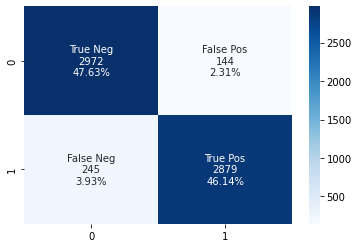

In [74]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
y_test_pred = model.predict(X_test_final)

In [ ]:
y_test_pred = np.round(y_test_pred)
y_test_pred = y_test_pred.astype('int64')

## Write the final output to a file in google drive directory

In [ ]:
final_df = pd.DataFrame()
final_df['id']=test_df['id']
final_df['label'] = y_test_pred
final_df.to_csv('/content/drive/My Drive/AI cert/output/lstm_keras_prediction_final.csv', encoding='utf-8', index=False)

## Transformers (BERT) Assessment

In [77]:
import torch
torch.cuda.is_available()

True

In [78]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 67 kB 6.4 MB/s 
     |████████████████████████████████| 895 kB 73.8 MB/s 
     |████████████████████████████████| 3.3 MB 56.7 MB/s 
     |████████████████████████████████| 596 kB 3.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [79]:
from transformers import BertTokenizer

In [80]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [81]:
!pip install -q transformers

In [82]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertConfig
from transformers import AdamW, BertForSequenceClassification, get_linear_schedule_with_warmup
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [83]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

In [84]:
train_df.shape

(20800, 8)

In [85]:
train_df.sample(3)

id  ...                                           combined
5748    5748  ...  Breitbart News speeding vehicle strike pedestr...
1681    1681  ...  JimQ civil war ii – fourth turning intensifyin...
16993  16993  ...  Natalie Dickinson moby destroyed trump passion...

[3 rows x 8 columns]

In [116]:
# train_df['combined'] = train_df['author'] + ' ' + train_df['title'] + ' ' + train_df['text']
sentences = train_df['text_lemmatized'].values

# Adding CLS and SEP tokens at the beginning and end of each sentence for BERT
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = train_df.label.values

In [117]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

Tokenize the first sentence:
['[CLS]', 'house', 'dem', 'aide', ':', 'didn', '’', 't', 'even', 'see', 'come', '##y', '’', 's', 'letter', 'jason', 'cha', '##ffe', '##tz', 't', '##wee', '##ted', 'darrell', 'luc', '##us', 'october', '30', ',', '2016', 'sub', '##scribe', 'jason', 'cha', '##ffe', '##tz', 'stump', 'american', 'fork', ',', 'utah', '(', 'image', 'courtesy', 'michael', 'jo', '##lley', ',', 'available', 'creative', 'commons', '-', 'by', 'license', ')', 'apology', 'keith', 'ol', '##berman', '##n', ',', 'doubt', 'worst', 'person', 'world', 'week', '–', 'fbi', 'director', 'james', 'come', '##y', '.', 'according', 'house', 'democratic', 'aide', ',', 'look', 'like', 'also', 'know', 'second', '-', 'worst', 'person', 'well', '.', 'turn', 'come', '##y', 'sent', 'now', '-', 'infamous', 'letter', 'announcing', 'fbi', 'looking', 'email', 'may', 'related', 'hillary', 'clinton', '’', 's', 'email', 'server', ',', 'ranking', 'democrat', 'relevant', 'committee', 'didn', '’', 't', 'hear', 'come',

In [118]:
MAX_LEN = 256

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [119]:
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)

In [120]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2021, test_size=0.3)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2021, test_size=0.3)

In [121]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

### Remove previously loaded data from GPU and clear CUDA cache otherwise it overloads the moemory

In [122]:
import gc

#model.cpu()
del model 
gc.collect()
torch.cuda.empty_cache()

### Due to small size of GPU and large size of corpus, limit the batch size to 16 to ensure smaller chunks don't overflow the GPU memory

In [123]:
batch_size = 16

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [124]:
try:
  import transformers
except:
  print("Installing transformers")
  !pip -qq install transformers
  
from transformers import BertModel, BertConfig
configuration = BertConfig()

# Initializing a model from the bert-base-uncased style configuration
model = BertModel(configuration)

# Accessing the model configuration
configuration = model.config
print(configuration)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.15.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



### Create the Bert model and print Bert model's details for a binary classifier (2 label classifier)

In [125]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

### Specify parameters for the transformer

In [126]:
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.weight']

optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.1},
    

    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [127]:
epochs = 4

optimizer = AdamW(optimizer_grouped_parameters,
                  lr = 2e-5, 
                  eps = 1e-8 
                  )
# Total number of training steps is number of batches * number of epochs.
# `train_dataloader` contains batched data so `len(train_dataloader)` gives 
# us the number of batches.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [128]:
# Accuracy function for the transformer model that enables proper evaluation of the metric

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [129]:
torch.cuda.is_available(), torch.cuda.device_count()

(True, 1)

## Train the transformer model and evaluate performance on the evaluation set 

In [130]:
t = [] 

train_loss_set = []

for _ in trange(epochs, desc="Epoch"):
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    optimizer.zero_grad()
    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs['loss']
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()

    # Update the learning rate.
    scheduler.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  predictions , true_labels = [], []

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    # Move logits and labels to CPU
    logits = logits['logits'].detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.append(logits)
    true_labels.append(label_ids)

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Train loss: 0.09730142444988794


Epoch:  25%|██▌       | 1/4 [13:30<40:32, 810.71s/it]

Validation Accuracy: 0.9935897435897436
Train loss: 0.012999536112145327


Epoch:  50%|█████     | 2/4 [27:04<27:05, 812.78s/it]

Validation Accuracy: 0.9884615384615385
Train loss: 0.0033244325822554426


Epoch:  75%|███████▌  | 3/4 [40:39<13:33, 813.54s/it]

Validation Accuracy: 0.9953525641025641
Train loss: 0.0009667958078312989


Epoch: 100%|██████████| 4/4 [54:11<00:00, 812.97s/it]

Validation Accuracy: 0.9956730769230769


In [131]:
print("Logistic Regression Validation set accuracy -->", lr_eval_data_accuracy)
print("LSTM model Validation set accuracy --> ", lstm_eval_data_accuracy)

Logistic Regression Validation set accuracy --> 0.9442307692307692
LSTM model Validation set accuracy -->  0.9376602564102564


### After accuracy score, check the Matthews Correlation Coefficient. We could check other metrics like f1 score as well but MCC provides a balanced score for model's performance for all aspects of the confusion matrix i.e. True Negatives, True Positives, False Positives, False Negatives

In [132]:
matthews_set = []

for i in range(len(true_labels)):
  matthews = matthews_corrcoef(true_labels[i],
                 np.argmax(predictions[i], axis=1).flatten())
  matthews_set.append(matthews)

In [133]:
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_true_labels = [item for sublist in true_labels for item in sublist]
matthews_corrcoef(flat_true_labels, flat_predictions)

0.9913483876998709

# Confusion Matrix for Validation Set

In [134]:
print("Accuracy for this solution is -->", accuracy_score(flat_true_labels, flat_predictions))


Accuracy for this solution is --> 0.9956730769230769


In [135]:
cnf_matrix = confusion_matrix(flat_true_labels, flat_predictions)
cnf_matrix

array([[3124,   10],
       [  17, 3089]])

In [136]:
print("Precision for this solution is -->", precision_score(flat_true_labels, flat_predictions))
print("Recall for this solution is -->", recall_score(flat_true_labels, flat_predictions))
print("Matthews Correlation Coefficient for this solution is --> ", matthews_corrcoef(flat_true_labels, flat_predictions))

Precision for this solution is --> 0.9967731526298806
Recall for this solution is --> 0.9945267224726336
Matthews Correlation Coefficient for this solution is -->  0.9913483876998709


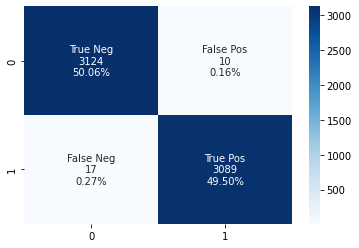

In [137]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

### process test data

In [138]:
# Create sentence and label lists
sentences = test_df['text_lemmatized'].values
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]

tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

MAX_LEN = 256

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
  
batch_size = 32  


prediction_data = TensorDataset(prediction_inputs, prediction_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

### Run the model on test set to produce the final output and save it to the google drive directory

In [139]:
model.eval()

y_pred = []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask = batch
  with torch.no_grad():  
    logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

  logits = logits['logits'].detach().cpu().numpy()
  
  y_pred.append(logits)

In [140]:
flat_predictions = [item for sublist in y_pred for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()
flat_predictions

array([0, 1, 1, ..., 0, 1, 0])

In [141]:
final_df = pd.DataFrame()
final_df['id']=test_df['id']
final_df['label'] = flat_predictions
final_df.to_csv('/content/drive/My Drive/AI cert/output/bert_prediction_final.csv', encoding='utf-8', index=False)